In [1]:
import json
import pandas as pd
from utils import flatten_one_level, create_wordcloud

with open('staging_claims_analysis.json', 'r') as f:
    data = json.load(f)

analyzed_comments = data['analyzed_comments']
analyzed_comments = [flatten_one_level(comment) for comment in analyzed_comments]
df = pd.DataFrame(analyzed_comments)
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df.sort_values('created_utc', inplace=True)

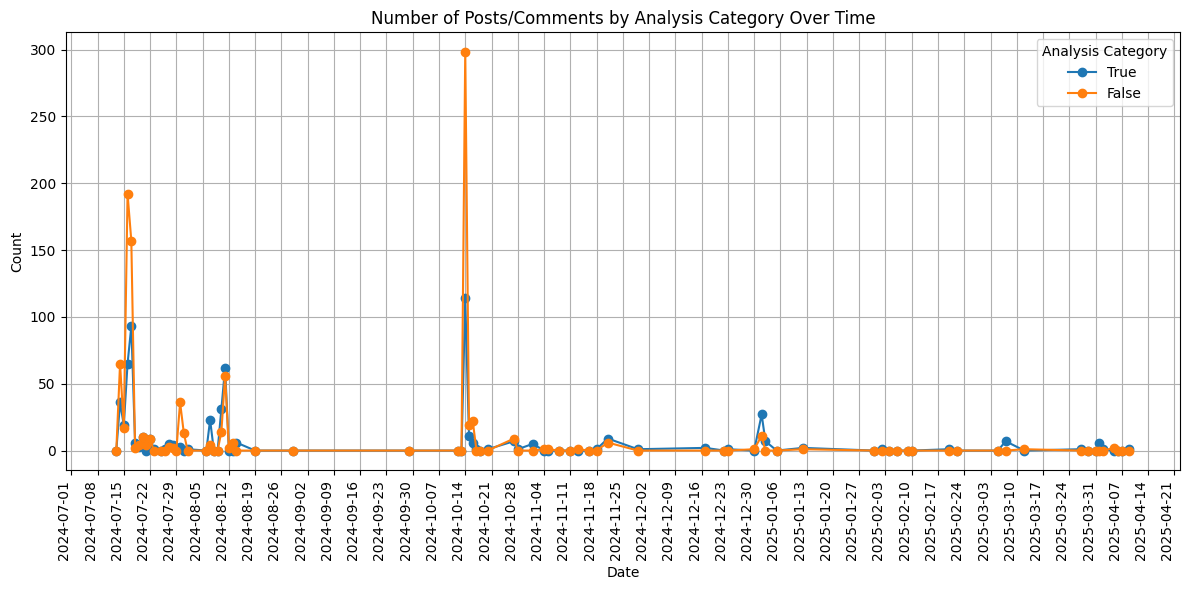

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter, WeekdayLocator

# Convert created_utc to datetime if not already done
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Group by date and analysis_supports, then count
daily_counts = df.groupby([df['created_utc'].dt.date, 'analysis_supports']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 6))
for category in ['true', 'false']: # , 'neutral'
    if category in daily_counts.columns:
        plt.plot(daily_counts.index, daily_counts[category], label=category.capitalize(), marker='o')

ax = plt.gca()
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=0))  # Show a label for every Monday
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate(rotation=45, ha='right')  # Rotate labels for better readability


plt.title('Number of Posts/Comments by Analysis Category Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Analysis Category')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

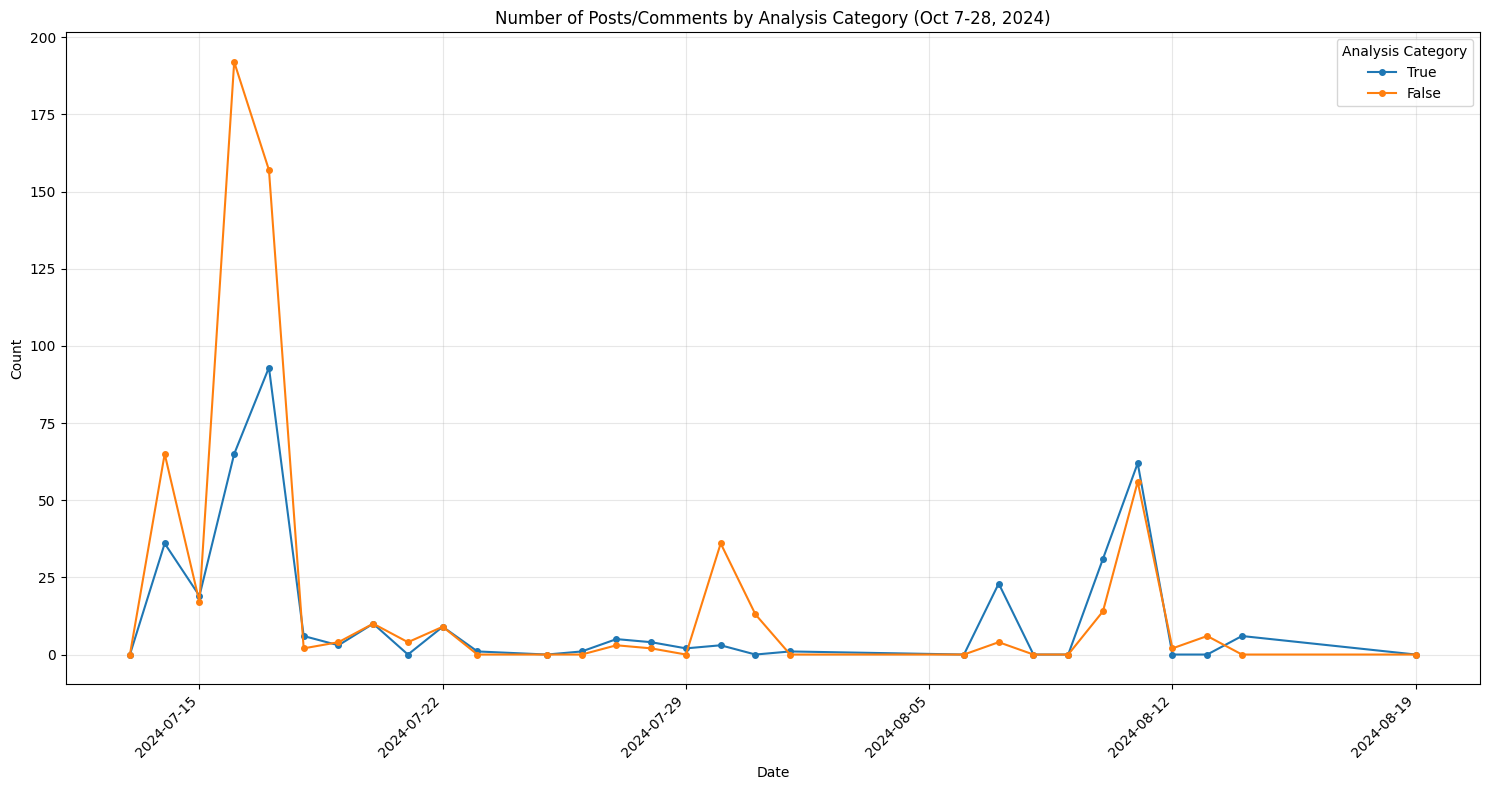

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter, WeekdayLocator
from datetime import datetime, date

# Convert created_utc to datetime if not already done
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Group by date and analysis_supports, then count
daily_counts = df.groupby([df['created_utc'].dt.date, 'analysis_supports']).size().unstack(fill_value=0)

# Create a new figure for the zoomed view
plt.figure(figsize=(15, 8))

# Filter data for the specific date range
start_date = date(2024, 7, 13)
end_date = date(2024, 8, 19)
mask = (daily_counts.index >= start_date) & (daily_counts.index <= end_date)
zoomed_data = daily_counts[mask]

# Plot the zoomed data
for category in ['true', 'false']: #, 'neutral'
    if category in zoomed_data.columns:
        plt.plot(zoomed_data.index, zoomed_data[category], label=category.capitalize(), marker='o', markersize=4)

# Format the x-axis with daily labels for the zoomed view
ax = plt.gca()
ax.xaxis.set_major_locator(WeekdayLocator(byweekday=0))  # Show a label for every Monday
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate(rotation=45, ha='right')

plt.title('Number of Posts/Comments by Analysis Category (Oct 7-28, 2024)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Analysis Category')
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

{"he'd", "you'll", 'only', 'where', 'who', "didn't", 'over', 'not', 'into', "weren't", 'down', "he'll", 'then', 'were', 'are', 'k', 'like', 'why', 'hence', 'most', "shan't", 'r', "he's", 'otherwise', 'am', 'again', 'other', "hasn't", 'through', 'his', 'so', 'www', "haven't", 'would', 'if', 'its', 'nor', 'too', 'after', "don't", 'claim', 'yours', 'or', 'whom', "we've", 'all', "doesn't", 'comment', 'under', "they're", 'has', 'but', "she'll", 'did', "wasn't", "why's", 'and', "couldn't", 'does', 'also', 'is', "she's", 'an', "we'd", 'as', 'do', 'be', 'by', "i'll", "we'll", 'however', "where's", 'yourselves', "they'll", 'word2', "what's", 'at', 'been', 'during', 'up', "can't", 'what', 'it', "who's", 'such', 'me', "you're", 'can', 'out', 'own', 'until', 'these', 'cannot', "we're", 'yourself', 'in', 'therefore', "mustn't", "aren't", 'for', "i'd", 'each', 'we', "when's", 'you', 'your', 'because', 'any', 'myself', "you'd", 'very', 'shall', 'the', 'them', 'some', 'having', "that's", "i'm", 'get',

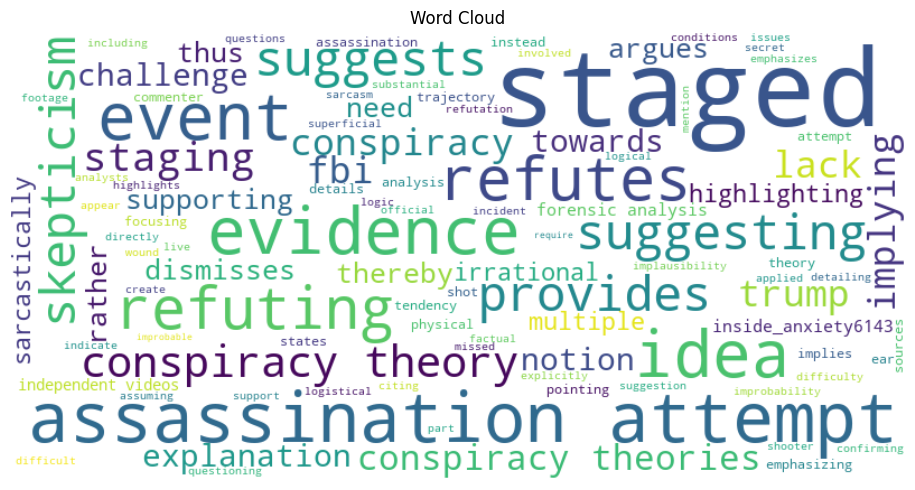

Counter({'the': 176,
         'that': 42,
         'of': 36,
         'comment': 35,
         'staged': 32,
         'was': 29,
         'last': 26,
         'claim': 25,
         'it': 23,
         'and': 22,
         'by': 20,
         'conspiracy': 19,
         'assassination': 18,
         'attempt': 18,
         'a': 15,
         'idea': 13,
         'evidence': 13,
         'to': 12,
         'refutes': 11,
         'event': 11,
         'theory': 10,
         'is': 10,
         'refuting': 10,
         'for': 8,
         'suggesting': 7,
         'skepticism': 7,
         'such': 7,
         'an': 7,
         'suggests': 7,
         'provides': 7,
         'analysis': 7,
         'staging': 6,
         'implying': 6,
         'theories': 6,
         'notion': 5,
         'towards': 5,
         'lack': 5,
         'this': 5,
         'fbi': 5,
         'forensic': 5,
         'independent': 5,
         'dismisses': 4,
         'explanation': 4,
         'about': 4,
         'rath

In [22]:
target_date = '2024-07-30'
support_level = 'false'
target_date = datetime.strptime(target_date, '%Y-%m-%d').date()
    
# Filter data for the specific date and support level
filtered_data = df[
    (df['created_utc'].dt.date == target_date) & 
    (df['analysis_supports'] == support_level)
]

# Combine all reasoning text
text = filtered_data['analysis_reasoning'].dropna()
# text = filtered_data['title'].dropna().tolist() + filtered_data['selftext_preview'].dropna().tolist() + filtered_data['body'].dropna().tolist()
text = ' '.join(text)


create_wordcloud(text, stopwords={'last', 'comment', 'claim'})

['1218/--- Twenty Ninth July Twenty Twenty Four Thirteen Children Stabbed Two Die In Britain= 911']

In [21]:
print(text)

1218/--- Twenty Ninth July Twenty Twenty Four Thirteen Children Stabbed Two Die In Britain= 911 **TWENTY NINTH JULY TWENTY TWENTY FOUR THIRTEEN CHILDREN STABBED TWO DIE IN BRITAIN= 911**

(Update--another child just died in the Stabbing spree in Britain)

**TWENTY NINTH JULY TWENTY TWENTY FOUR THREE CHILDREN KILLED IN STABBING SPREE IN UK= 911**

In this post I continue to list events staged on 29 July

Dead Children on NASA's 66th Birthday

29 July--13 children were stabbed in Southport Englad-- at a Taylor Swift themed dance class--run by some group *predictably* named-- Enlighten Kids Yoga

TAYLOR SWIFT-THEMED= **223**

SOUTHPORT ENGLAND= **223**

SKULL AND CROSSBONES= **223**

.

https://preview.redd.it/e8yb0v8z2ofd1.png?width=698&format=png&auto=webp&s=aef2ef70cd3f89abf40557ccacb1decc918a59cf

Globalists stage Dead Children hoaxes becos they're guaranteed to generate world headlines--thats how they signal to their minions about upcoming events

**NATIONAL AERONAUTICS AND SPACE ADM